# Project Name:Linda1-Health and Fitness Classification with Decision Trees

## Load important libraries

In [1]:
#Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn import tree
from IPython.display import Image

## Load Data

In [2]:
#import the csv file 
df=pd.read_csv('C:\\Users\\User\\Downloads\\bodyPerformance - bodyPerformance.csv.csv')

df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


## Arrange Data into Features Matrix and Target Vector

Make Class series as the target.
Make Other features for your X.  

In [3]:
print(df.columns)

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')


In [4]:
feature_cols = ['age',  'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']

# Create X and y

In [5]:
X = df.loc[:, feature_cols]

y = df['class']

# Split the data into training and testing sets
One of the benefits of Decision Trees is that we don't have to standardize our data unlike PCA and logistic regression which are sensitive to effects of not standardizing your data. This can often be an extra step.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)

# Fit a Classification Tree


## Step 1: Import the model we want to use

In sklearn, all machine learning models are implemented as Python classes

In [7]:
from sklearn.tree import DecisionTreeClassifier

## Step 2: Make an instance of the Model

In [8]:
clf = DecisionTreeClassifier(max_depth = 3)

## Step 3: Training the model on the data, storing the information learned from the data. Model is learning the relationship between features and labels

In [9]:
model=clf.fit(X_train, y_train)

## Step 4: Predict the labels of new data (new passengers)

Uses the information the model learned during the model training process

In [10]:
# Returns a NumPy Array
# Predict for One Observation (image)
clf.predict(X_test)

array(['A', 'B', 'A', ..., 'A', 'B', 'A'], dtype=object)

## Make predictions on the testing set and calculate the accuracy

In [11]:
# class predictions (not predicted probabilities)
predictions = clf.predict(X_test)

In [12]:
# calculate classification accuracy
score = clf.score(X_test, y_test)

In [13]:
score

0.5419528217378322

Compare our testing accuracy to the null accuracy
Null accuracy is usually considered the accuracy obtained by always predicting the most frequent class.

When interpreting the predictive power of a model, it's best to compare it to a baseline using a dummy model, sometimes called a baseline model. A dummy model is simply using the mean, median, or most common value as the prediction. This forms a benchmark to compare our model against and becomes especially important in classification where our null accuracy might be 95 percent.

In [14]:
y_test.value_counts()

D    860
B    840
A    828
C    821
Name: class, dtype: int64

## Confusion matrix of Body Performance predictions
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Hint you might wish to consider googling this one if you don't know how to do it.

In [15]:
cm = metrics.confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           A       0.54      0.79      0.64       828
           B       0.38      0.52      0.44       840
           C       0.71      0.18      0.29       821
           D       0.75      0.66      0.70       860

    accuracy                           0.54      3349
   macro avg       0.59      0.54      0.52      3349
weighted avg       0.59      0.54      0.52      3349



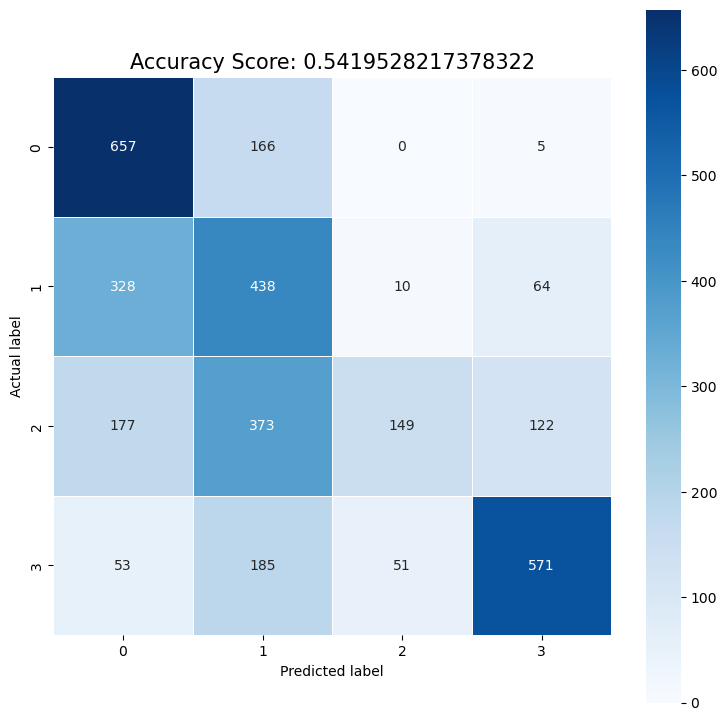

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

# Classification Report:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

## Receiver Operating Characteristic (ROC) Curve for Multiclass

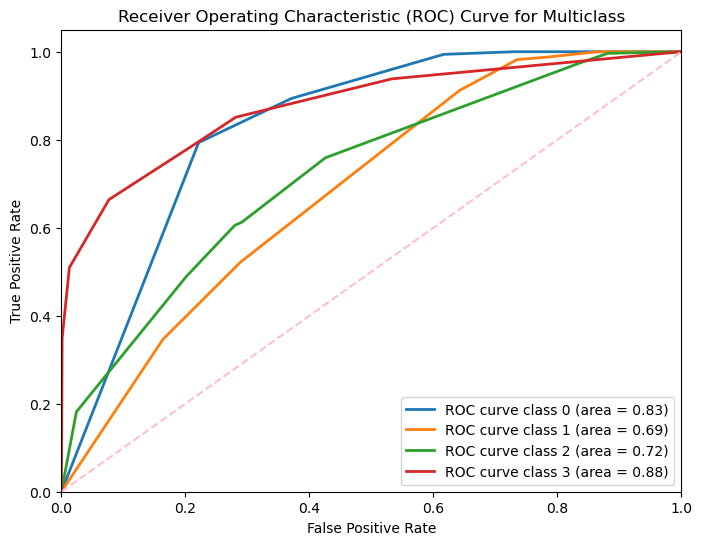

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass
y_test_bin = label_binarize(y_test, classes=['A', 'B', 'C','D'])  # Replace with your class labels
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for all classes
predictions_proba = model.predict_proba(X_test)  # This returns probabilities for all classes

# Create a figure for the ROC curve
plt.figure(figsize=(8, 6))

# Iterate through each class and calculate ROC curve
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc))

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')

# Customizing the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()


## Feature Importance
Scikit-learn allows you to calculate feature importance which is the total amount that Gini index or Entropy decrease due to splits over a given feature

A number between 0 and 1 assigned to each feature
A feature importance of 0 means that the feature was not used in prediction
A Feature importance 1 means that the feature predicts the target perfectly.
All feature importances are normalized to sum to 1.

In [33]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
sit and bend forward_cm,0.709
body fat_%,0.171
sit-ups counts,0.110
age,0.010
height_cm,0.000
weight_kg,0.000
diastolic,0.000
systolic,0.000
gripForce,0.000


## Creating a Decision Tree Visualization with Matplotlib

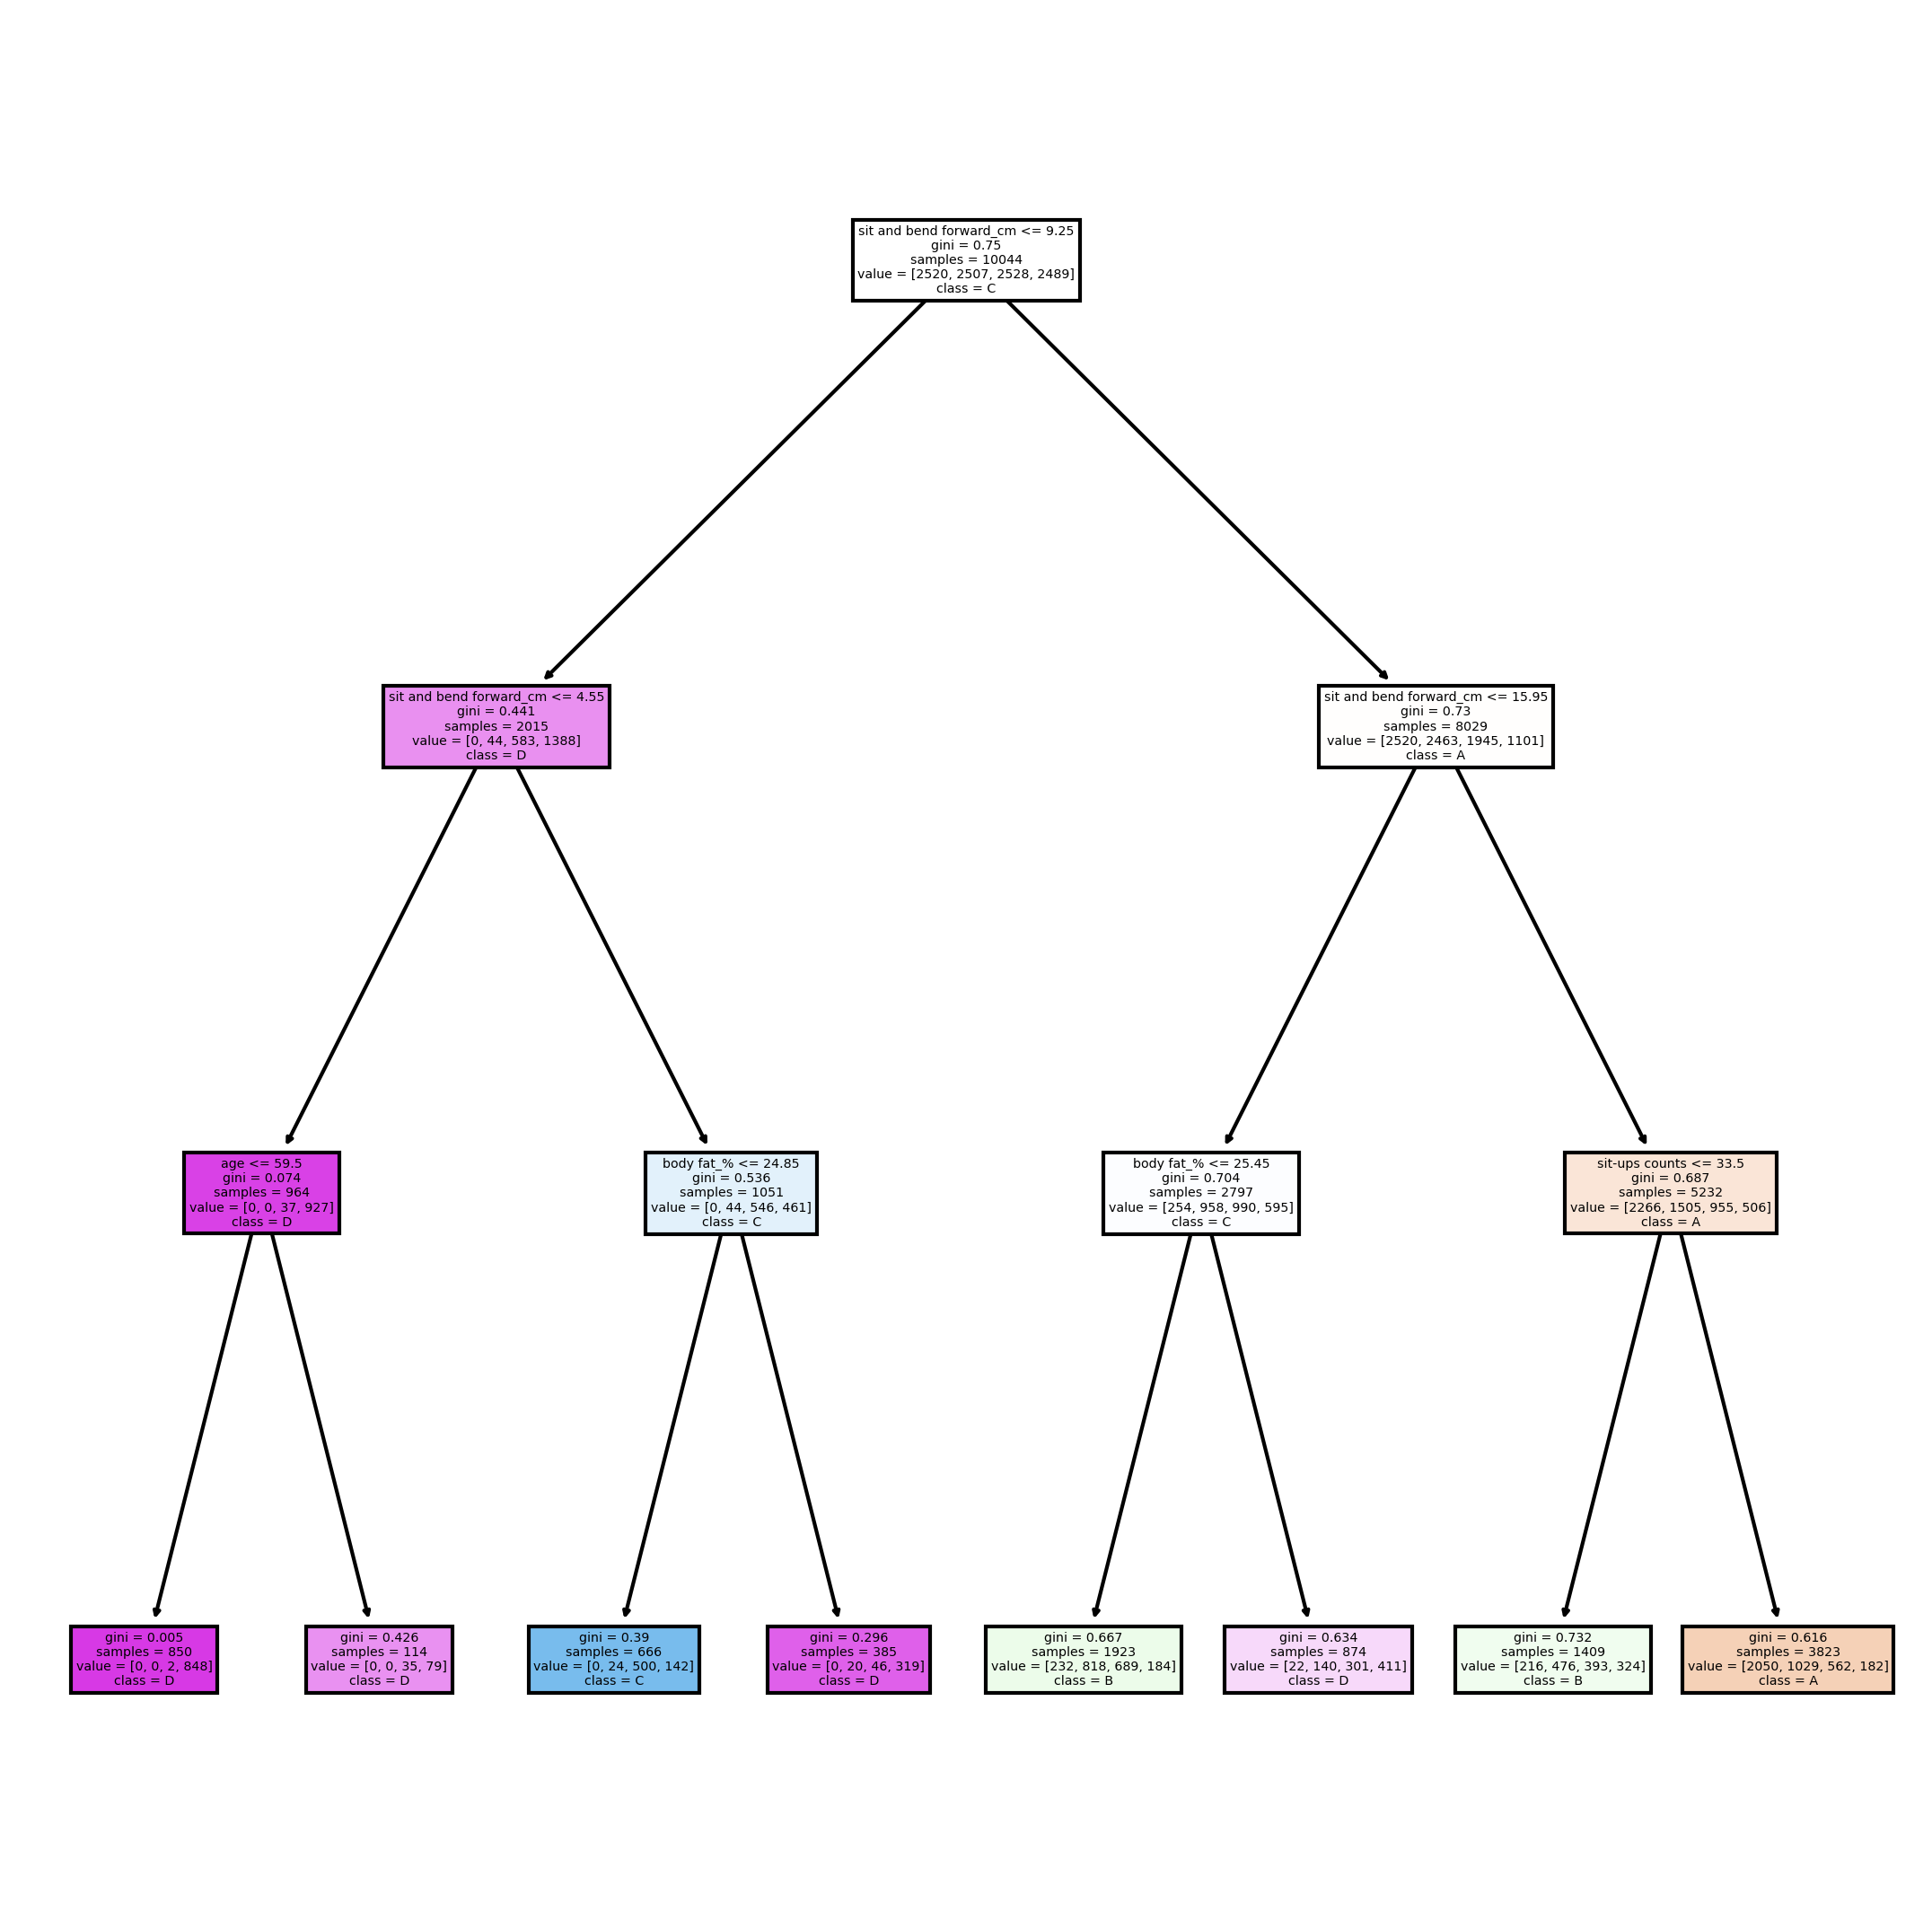

In [34]:
plt.figure(figsize=(9,9), dpi = 300)
tree.plot_tree(clf,
               feature_names = feature_cols, 
               class_names=['A', 'B','C','D'],
               filled = True);

## !Done